# YOLOv8 Webcam Object Detection

Dieses Notebook demonstriert Echtzeit-Objekterkennung mit YOLOv8 und einer Webcam.

---

## 📋 Inhaltsverzeichnis
1. Installation und Setup
2. YOLOv8 Grundlagen
3. Webcam Setup
4. Detection Pipeline
5. Vollständige Implementierung

---

## 1. Installation und Setup

Installiere alle benötigten Pakete:

In [1]:
# Installation der Requirements
# !pip install ultralytics opencv-python numpy pillow matplotlib

# Imports
import cv2
import numpy as np
from ultralytics import YOLO
import time
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from PIL import Image

print("✅ Alle Pakete erfolgreich importiert!")

✅ Alle Pakete erfolgreich importiert!


## 2. YOLOv8 Grundlagen

### Was ist YOLOv8?
- **YOLO** = You Only Look Once
- State-of-the-art Objekterkennung
- Echtzeit-fähig
- Verschiedene Modellgrößen verfügbar

### Verfügbare Models:
- `yolov8n.pt` - Nano (schnellstes, kleinste Genauigkeit)
- `yolov8s.pt` - Small
- `yolov8m.pt` - Medium
- `yolov8l.pt` - Large
- `yolov8x.pt` - Extra Large (langsamstes, höchste Genauigkeit)

In [2]:
# YOLOv8 Model laden
print("📦 Lade YOLOv8 Model...")
model = YOLO('yolov8n.pt')  # Nano Model für schnelle Inferenz
print("✅ Model geladen!")

# Zeige Model-Informationen
print(f"\n📊 Model Info:")
print(f"   - Anzahl Klassen: {len(model.names)}")
print(f"   - Beispiel-Klassen: {list(model.names.values())[:10]}...")

📦 Lade YOLOv8 Model...
✅ Model geladen!

📊 Model Info:
   - Anzahl Klassen: 80
   - Beispiel-Klassen: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light']...


## 3. Webcam Setup

Teste ob die Webcam funktioniert:

📹 Teste Webcam...
✅ Webcam erfolgreich geöffnet!
   - Frame Größe: (480, 640, 3)
   - Frame Typ: uint8


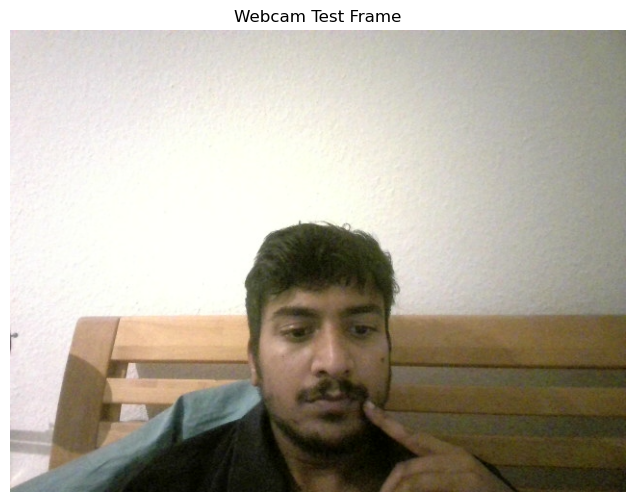

✅ Webcam Test abgeschlossen


In [3]:
# Webcam Test
print("📹 Teste Webcam...")
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("❌ Webcam konnte nicht geöffnet werden!")
else:
    print("✅ Webcam erfolgreich geöffnet!")
    
    # Lese ein Test-Frame
    ret, frame = cap.read()
    
    if ret:
        print(f"   - Frame Größe: {frame.shape}")
        print(f"   - Frame Typ: {frame.dtype}")
        
        # Zeige Frame
        plt.figure(figsize=(10, 6))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title("Webcam Test Frame")
        plt.axis('off')
        plt.show()
    
    cap.release()
    print("✅ Webcam Test abgeschlossen")

## 4. Detection Pipeline

### Schritt-für-Schritt Erklärung:

1. **Frame von Webcam lesen**
2. **YOLOv8 Inferenz durchführen**
3. **Ergebnisse verarbeiten**
4. **Visualisierung erstellen**
5. **Anzeigen und wiederholen**

In [4]:
# Beispiel: Einzelnes Frame verarbeiten
def process_single_frame():
    """
    Verarbeitet ein einzelnes Frame von der Webcam.
    """
    cap = cv2.VideoCapture(0)
    
    # Lese Frame
    ret, frame = cap.read()
    
    if not ret:
        print("❌ Fehler beim Lesen")
        cap.release()
        return
    
    # YOLOv8 Inferenz
    print("🔍 Führe Detection durch...")
    results = model(frame, verbose=False)
    
    # Extrahiere Detektionen
    boxes = results[0].boxes
    print(f"✅ {len(boxes)} Objekte erkannt!")
    
    # Zeichne Detektionen
    for box in boxes:
        # Koordinaten
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
        
        # Konfidenz und Klasse
        confidence = float(box.conf[0])
        class_id = int(box.cls[0])
        class_name = results[0].names[class_id]
        
        # Zeichne Box
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        # Label
        label = f"{class_name}: {confidence:.2f}"
        cv2.putText(frame, label, (x1, y1-10), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
        
        print(f"   - {class_name}: {confidence:.2f} @ ({x1}, {y1}, {x2}, {y2})")
    
    # Zeige Ergebnis
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(f"YOLOv8 Detection - {len(boxes)} Objekte erkannt")
    plt.axis('off')
    plt.show()
    
    cap.release()

# Führe aus
process_single_frame()

KeyboardInterrupt: 

## 5. Vollständige Implementierung

### WebcamDetector Klasse

Hier ist die vollständige, saubere Implementierung:

In [ ]:
class WebcamDetector:
    """
    Professionelle Klasse für YOLOv8 Webcam Detection.
    """
    
    def __init__(self, model_name='yolov8n.pt', confidence=0.5):
        """
        Args:
            model_name: YOLOv8 Model Name
            confidence: Minimum Konfidenz (0.0 - 1.0)
        """
        print("🚀 Initialisiere Detector...")
        
        # Lade Model
        self.model = YOLO(model_name)
        self.confidence_threshold = confidence
        
        # Öffne Webcam
        self.cap = cv2.VideoCapture(0)
        if not self.cap.isOpened():
            raise ValueError("Webcam nicht verfügbar!")
        
        # Setze Auflösung
        self.cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
        self.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
        
        print("✅ Initialisierung erfolgreich!")
    
    def draw_detections(self, frame, results):
        """
        Zeichnet Detektionen auf Frame.
        """
        for result in results:
            boxes = result.boxes
            
            for box in boxes:
                # Extrahiere Daten
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
                confidence = float(box.conf[0])
                class_id = int(box.cls[0])
                class_name = result.names[class_id]
                
                # Filter nach Konfidenz
                if confidence < self.confidence_threshold:
                    continue
                
                # Farbe (konsistent pro Klasse)
                np.random.seed(class_id)
                color = tuple(np.random.randint(0, 255, 3).tolist())
                
                # Zeichne Box
                cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
                
                # Label
                label = f"{class_name}: {confidence:.2f}"
                (tw, th), _ = cv2.getTextSize(
                    label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2
                )
                
                # Label Hintergrund
                cv2.rectangle(frame, (x1, y1-th-10), (x1+tw, y1), color, -1)
                
                # Label Text
                cv2.putText(
                    frame, label, (x1, y1-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2
                )
        
        return frame
    
    def add_info(self, frame, fps, count):
        """
        Fügt Info-Overlay hinzu.
        """
        # Halbtransparenter Hintergrund
        overlay = frame.copy()
        cv2.rectangle(overlay, (10, 10), (250, 80), (0, 0, 0), -1)
        frame = cv2.addWeighted(overlay, 0.6, frame, 0.4, 0)
        
        # Text
        cv2.putText(frame, f"FPS: {fps:.1f}", (20, 35),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        cv2.putText(frame, f"Detektionen: {count}", (20, 65),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        
        return frame
    
    def run(self):
        """
        Hauptschleife.
        """
        print("\n🎥 Starte Detection...")
        print("💡 Drücke 'q' zum Beenden")
        print("💡 Drücke 's' für Screenshot\n")
        
        fps = 0
        frame_count = 0
        start_time = time.time()
        
        try:
            while True:
                ret, frame = self.cap.read()
                if not ret:
                    break
                
                # Detection
                results = self.model(frame, verbose=False)
                detection_count = len(results[0].boxes)
                
                # Visualisierung
                frame = self.draw_detections(frame, results)
                
                # FPS
                frame_count += 1
                if frame_count >= 10:
                    end_time = time.time()
                    fps = frame_count / (end_time - start_time)
                    frame_count = 0
                    start_time = time.time()
                
                # Info
                frame = self.add_info(frame, fps, detection_count)
                
                # Anzeigen
                cv2.imshow('YOLOv8 Detection', frame)
                
                # Keyboard
                key = cv2.waitKey(1) & 0xFF
                if key == ord('q'):
                    break
                elif key == ord('s'):
                    filename = f"screenshot_{time.strftime('%Y%m%d-%H%M%S')}.jpg"
                    cv2.imwrite(filename, frame)
                    print(f"📸 Gespeichert: {filename}")
        
        except KeyboardInterrupt:
            print("\n⚠️  Unterbrochen")
        
        finally:
            self.cleanup()
    
    def cleanup(self):
        """Cleanup."""
        self.cap.release()
        cv2.destroyAllWindows()
        print("✅ Cleanup abgeschlossen")

print("✅ WebcamDetector Klasse definiert!")

### Starte Detection

**Hinweis:** Dies funktioniert nur wenn du eine Webcam hast und außerhalb des Notebooks ausführst!

In [ ]:
# Erstelle Detector
detector = WebcamDetector(
    model_name='yolov8n.pt',
    confidence=0.5
)

# Starte (in Jupyter nur für Test)
# detector.run()

## 📝 Zusammenfassung

### Was wir gelernt haben:
1. ✅ YOLOv8 Model laden und verwenden
2. ✅ Webcam mit OpenCV öffnen
3. ✅ Echtzeit-Detection implementieren
4. ✅ Ergebnisse visualisieren
5. ✅ Sauberen, professionellen Code schreiben

### Nächste Schritte:
- Verwende das `webcam_detection.py` Script für Production
- Experimentiere mit verschiedenen Models (yolov8s, yolov8m)
- Passe Konfidenz-Threshold an
- Füge Custom Features hinzu

---

**Viel Erfolg beim Interview! 🚀**